# Diabetic readmission

# Step 1: Data Preprocessing

PCA for feature engineering  - Junxue

Missing values / imputation or deletion - Zoe 

Dummy conversion - James

Oversampling the readmission within 30 days to correct the imbalancing - Sandra (edited) 

DATAPROCESSING done by 11/23

In [615]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt  

# import needed libraries for models
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.inspection import permutation_importance
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

In [616]:
# set pandas options so we see all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
### Merging didn't work
# pip install nbmerge

#!nbmerge james.ipynb pca.ipynb missing.ipynb > merged.ipynb

# Unreadable Notebook: C:\Users\sandr\Box Sync\MScA\31009 
# Machine Learning\Group project\merged.ipynb NotJSONError("Notebook does not appear to be JSON: ''...")

# Import

In [617]:
data = pd.read_csv('diabetic_data.csv')

data.describe(include='all')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766,101766,101766,101766.000000,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,6,3,10,10,NaN,NaN,NaN,NaN,18,73,NaN,NaN,NaN,NaN,NaN,NaN,717,749,790,NaN,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,?,?,NaN,NaN,NaN,NaN,NaN,NaN,428,276,250,NaN,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,98569,NaN,NaN,NaN,NaN,40256,49949,NaN,NaN,NaN,NaN,NaN,NaN,6862,6752,11555,NaN,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,NaN,NaN,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,NaN,NaN,NaN,7.422607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,NaN,NaN,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,NaN,NaN,NaN,1.933600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,NaN,NaN,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,NaN,NaN,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,NaN,NaN,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [618]:
data['weight'].value_counts()

# Too many missing values - drop

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [619]:
data['payer_code'].value_counts()

# Too many missing values - drop

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

# Missing values

In [620]:
data = data.drop(columns = ['weight','payer_code'])
data = data.dropna(subset=['encounter_id','patient_nbr','race','gender','age',
                           'admission_type_id','discharge_disposition_id',
                           'admission_source_id','time_in_hospital','max_glu_serum',
                           'A1Cresult','metformin','repaglinide','nateglinide',
                           'chlorpropamide','glimepiride','acetohexamide','glipizide',
                           'glyburide','tolbutamide','pioglitazone','rosiglitazone',
                           'acarbose','miglitol','troglitazone','tolazamide','examide',
                           'citoglipton','insulin','glyburide-metformin',
                           'glipizide-metformin','glimepiride-pioglitazone',
                           'metformin-rosiglitazone','metformin-pioglitazone','change',
                           'diabetesMed','readmitted'])

In [621]:
data['Numeric_diag_1'] = pd.to_numeric(data['diag_1'], errors='coerce')
mask = data['Numeric_diag_1'].isna()
data.loc[mask, 'FreeText_diag_1'] = data.loc[mask, 'diag_1']
data = data.drop(columns=['diag_1'])

In [622]:
data['Numeric_diag_2'] = pd.to_numeric(data['diag_2'], errors='coerce')
mask = data['Numeric_diag_2'].isna()
data.loc[mask, 'FreeText_diag_2'] = data.loc[mask, 'diag_2']
data = data.drop(columns=['diag_2'])

In [623]:
data['Numeric_diag_3'] = pd.to_numeric(data['diag_3'], errors='coerce')
mask = data['Numeric_diag_3'].isna()
data.loc[mask, 'FreeText_diag_3'] = data.loc[mask, 'diag_3']
data = data.drop(columns=['diag_3'])

In [624]:
data['Numeric_diag_1'] = data['Numeric_diag_1'].fillna(data['Numeric_diag_1'].mean())
data['Numeric_diag_2'] = data['Numeric_diag_2'].fillna(data['Numeric_diag_2'].mean())
data['Numeric_diag_3'] = data['Numeric_diag_3'].fillna(data['Numeric_diag_3'].mean())

In [625]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN


# Dummies

In [626]:
# look at dataset as a whole
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 51 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
number_diagnoses            101766 non-null int64
max_glu_serum               101766 

In [627]:
# drop encounter id and patient number fields since they do not provide any value to model
data_prep = data.drop(['encounter_id'],axis=1)
# data_prep = data_prep.drop(['patient_nbr'],axis=1) # dropped above

# look at new data processing dataframe
data_prep.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3
0,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?
1,55629189,Caucasian,Female,[10-20),1,1,7,3,?,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27
3,82442376,Caucasian,Male,[30-40),1,1,7,2,?,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN
4,42519267,Caucasian,Male,[40-50),1,1,7,1,?,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN


In [628]:
# look at race feature values
data_prep['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [629]:
# drop records from race where there ia ?
data_prep = data_prep[data_prep['race'] != '?'] 

In [630]:
# look at race feature values
data_prep['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [631]:
# one hot encode race column
data_prep = pd.get_dummies(data_prep, columns=['race'])

# look at data
data_prep.head()

,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other
0,8222157,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0
1,55629189,Female,[10-20),1,1,7,3,?,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0
2,86047875,Female,[20-30),1,1,7,2,?,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0
3,82442376,Male,[30-40),1,1,7,2,?,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0
4,42519267,Male,[40-50),1,1,7,1,?,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0


In [632]:
# look at gender feature values
data_prep['gender'].value_counts()

Female             53575
Male               45917
Unknown/Invalid        1
Name: gender, dtype: int64

In [633]:
# drop records from gender where there is Unknown/Invalid
data_prep = data_prep[data_prep['gender'] != 'Unknown/Invalid'] 

In [634]:
# look at gender feature values
data_prep['gender'].value_counts()

Female    53575
Male      45917
Name: gender, dtype: int64

In [635]:
# one hot encode gender column
data_prep = pd.get_dummies(data_prep, columns=['gender'])

# look at data
data_prep.head()

,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male
0,8222157,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0,1,0
1,55629189,[10-20),1,1,7,3,?,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0,1,0
2,86047875,[20-30),1,1,7,2,?,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0,1,0
3,82442376,[30-40),1,1,7,2,?,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0,0,1
4,42519267,[40-50),1,1,7,1,?,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0,0,1


In [636]:
# look at age feature values
data_prep['age'].value_counts()

[70-80)     25468
[60-70)     21988
[50-60)     16895
[80-90)     16800
[40-50)      9465
[30-40)      3699
[90-100)     2724
[20-30)      1611
[10-20)       682
[0-10)        160
Name: age, dtype: int64

In [637]:
# one hot encode gender column
data_prep = pd.get_dummies(data_prep, columns=['age'])

# look at data
data_prep.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100)
0,8222157,6,25,1,1,Pediatrics-Endocrinology,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,55629189,1,1,7,3,?,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,86047875,1,1,7,2,?,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,82442376,1,1,7,2,?,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,42519267,1,1,7,1,?,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [638]:
# look at admission_type_id values
data_prep['admission_type_id'].value_counts() #int field with no missing values. Leave as is.

1    52900
3    18507
2    17786
6     5225
5     4727
8      317
7       20
4       10
Name: admission_type_id, dtype: int64

In [639]:
# look at discharge_disposition_id values
data_prep['discharge_disposition_id'].value_counts() #int field with no missing values. Leave as is.

1     58767
3     13614
6     12698
18     3673
2      2061
22     1981
11     1608
5      1143
25      973
4       765
7       611
23      406
13      397
14      369
28      138
8       107
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [640]:
# look at time_in_hospital values
data_prep['time_in_hospital'].value_counts() #int field with no missing values. Leave as is.

3     17342
2     16841
1     13877
4     13605
5      9763
6      7366
7      5720
8      4297
9      2940
10     2291
11     1816
12     1427
13     1189
14     1018
Name: time_in_hospital, dtype: int64

In [641]:
# look at medical_specialty values
data_prep['medical_specialty'].value_counts() #This field has too many categories. Need to consolidate.

?                                       48766
InternalMedicine                        14197
Emergency/Trauma                         7540
Family/GeneralPractice                   7271
Cardiology                               5246
Surgery-General                          3043
Nephrology                               1593
Orthopedics                              1377
Orthopedics-Reconstructive               1190
Radiologist                              1117
Pulmonology                               840
Psychiatry                                829
Urology                                   670
ObstetricsandGynecology                   649
Surgery-Cardiovascular/Thoracic           629
Gastroenterology                          560
Surgery-Vascular                          533
Surgery-Neuro                             455
PhysicalMedicineandRehabilitation         382
Oncology                                  347
Pediatrics                                249
Hematology/Oncology               

In [613]:
# drop records from medical_specialty where there is a ?
# data_prep = data_prep[data_prep['medical_specialty'] != '?'] 

In [642]:
# look at medical_specialty values
data_prep['medical_specialty'].value_counts()

?                                       48766
InternalMedicine                        14197
Emergency/Trauma                         7540
Family/GeneralPractice                   7271
Cardiology                               5246
Surgery-General                          3043
Nephrology                               1593
Orthopedics                              1377
Orthopedics-Reconstructive               1190
Radiologist                              1117
Pulmonology                               840
Psychiatry                                829
Urology                                   670
ObstetricsandGynecology                   649
Surgery-Cardiovascular/Thoracic           629
Gastroenterology                          560
Surgery-Vascular                          533
Surgery-Neuro                             455
PhysicalMedicineandRehabilitation         382
Oncology                                  347
Pediatrics                                249
Hematology/Oncology               

In [643]:
# convert medical_specialty field to top 5 categories and other
data_prep['Med_Spec_Missing']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('?') else 0)
data_prep['Med_Spec_InternalMedicine']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('InternalMedicine') else 0)
data_prep['Med_Spec_Emergency/Trauma']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('Emergency/Trauma') else 0)
data_prep['Med_Spec_Family/GeneralPractice']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('Family/GeneralPractice') else 0)

# Clinically meaningful - diabetics get more heart disease and are twice as likely to die of heart attack or stroke 
# https://pubmed.ncbi.nlm.nih.gov/11587045/
data_prep['Med_Spec_Cardiology']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('Cardiology') else 0)
data_prep['Med_Spec_Surgery-General']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('Surgery-General') else 0)

# Sandra added nephrology as kidneys fail in diabetes
# https://www.mayoclinic.org/diseases-conditions/diabetic-nephropathy/symptoms-causes/syc-20354556
data_prep['Med_Spec_Nephrology']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('Nephrology') else 0)

# Sandra wanted to add endocrinology as they are the diabetic specialists, but there are only 118
# https://www.mayoclinic.org/diseases-conditions/diabetic-nephropathy/symptoms-causes/syc-20354556
#data_prep['Med_Spec_Endocrinology']=data_prep['medical_specialty'].apply(lambda x: 1 if x in ('Endocrinology') else 0)

data_prep['Med_Spec_Other']=data_prep['medical_specialty'].apply(lambda x: 0 if x in ('InternalMedicine','Emergency/Trauma','Family/GeneralPractice','Cardiology','Surgery-General', 'Nephrology', '?') else 1)

# drop original medical_specialty field
data_prep = data_prep.drop(['medical_specialty'],axis=1)

# look at data
data_prep.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),Med_Spec_Missing,Med_Spec_InternalMedicine,Med_Spec_Emergency/Trauma,Med_Spec_Family/GeneralPractice,Med_Spec_Cardiology,Med_Spec_Surgery-General,Med_Spec_Nephrology,Med_Spec_Other
0,8222157,6,25,1,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,55629189,1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,86047875,1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,82442376,1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,42519267,1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [644]:
# look at num_lab_procedures values
data_prep['num_lab_procedures'].value_counts() #int field with no missing values. Leave as is.

1      3146
43     2750
44     2448
45     2328
38     2164
46     2153
40     2142
41     2071
47     2070
42     2062
39     2059
37     2033
49     2019
48     2009
36     1912
50     1877
51     1877
35     1871
54     1828
52     1797
55     1786
56     1774
53     1763
57     1699
58     1668
34     1633
61     1604
59     1592
60     1561
63     1418
62     1408
30     1317
29     1312
32     1300
64     1299
31     1284
33     1259
65     1213
66     1180
2      1084
26     1070
67     1064
25     1029
68     1024
28     1019
69      972
19      960
9       919
10      824
23      820
70      801
27      797
71      781
20      752
17      735
72      731
18      723
24      720
22      683
11      676
21      668
3       658
73      652
74      595
16      536
75      506
12      496
76      455
15      442
77      416
13      395
4       370
8       355
78      348
79      329
14      329
7       316
80      288
5       281
81      280
6       280
82      225
83      222
84  

In [645]:
# look at num_procedures values
data_prep['num_procedures'].value_counts() #int field with no missing values. Leave as is.

0    45500
1    20328
2    12488
3     9269
6     4825
4     4098
5     2984
Name: num_procedures, dtype: int64

In [646]:
# look at num_medications values
data_prep['num_medications'].value_counts() #int field with no missing values. Leave as is.

13    5929
12    5866
11    5664
15    5662
14    5579
16    5305
10    5244
17    4819
9     4802
18    4421
8     4266
19    3965
20    3608
7     3401
21    3163
22    2812
6     2632
23    2384
24    2074
5     1964
25    1857
26    1576
27    1414
4     1376
28    1212
29     971
3      877
30     832
31     697
32     608
33     495
2      458
34     443
35     383
37     285
36     281
1      251
38     221
39     205
40     174
41     138
43     126
42     124
44      98
46      89
45      80
47      72
49      61
48      57
52      53
50      52
51      43
53      37
56      37
54      33
55      31
57      26
58      24
59      20
60      20
62      15
61      14
63      13
65      12
68       7
67       7
64       7
69       5
66       5
72       3
70       2
75       2
74       1
79       1
81       1
Name: num_medications, dtype: int64

In [647]:
# look at number_outpatient values
data_prep['number_outpatient'].value_counts() #int field with no missing values. Leave as is.

0     82992
1      8409
2      3543
3      2021
4      1083
5       525
6       299
7       155
8        98
9        83
10       57
11       41
13       31
12       30
14       28
15       20
16       15
17        8
21        7
20        7
22        5
18        5
19        3
24        3
27        3
23        2
25        2
26        2
29        2
33        2
35        2
36        2
40        1
28        1
34        1
37        1
38        1
39        1
42        1
Name: number_outpatient, dtype: int64

In [648]:
# look at number_emergency values
data_prep['number_emergency'].value_counts() #int field with no missing values. Leave as is.

0     88189
1      7615
2      2027
3       722
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
18        5
16        5
19        4
20        4
14        3
15        3
21        2
25        2
76        1
54        1
24        1
28        1
29        1
37        1
42        1
46        1
64        1
63        1
Name: number_emergency, dtype: int64

In [649]:
# look at number_inpatient values
data_prep['number_inpatient'].value_counts() #int field with no missing values. Leave as is.

0     65811
1     19218
2      7472
3      3374
4      1607
5       807
6       480
7       268
8       150
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
18        1
21        1
Name: number_inpatient, dtype: int64

# Question dropping diagnoses - Sandra

In [38]:
# drop all 3 diagnosis columns since we do not know how to use them
#data_prep = data_prep.drop(['diag_1'],axis=1)
#data_prep = data_prep.drop(['diag_2'],axis=1)
#data_prep = data_prep.drop(['diag_3'],axis=1)

In [650]:
print("Diag 1")
print(data_prep['Numeric_diag_1'].value_counts().head(10))
print(" ")
print(data_prep['FreeText_diag_1'].value_counts().head(11)) # One "?" in the top 10

Diag 1
428.0    6739
414.0    6406
786.0    3938
410.0    3518
486.0    3425
427.0    2712
491.0    2228
715.0    2099
682.0    1996
780.0    1991
Name: Numeric_diag_1, dtype: int64
 
V57    1181
V58     223
V55      70
V53      43
V54      42
?        19
V56      16
V71       9
V63       8
V45       4
V66       2
Name: FreeText_diag_1, dtype: int64


## Diag 1

### Numeric

414.00000    3668  Other forms of chronic ischemic heart disease

428.00000    3263  Heart failure

786.00000    2092 Symptoms involving respiratory system and other chest symptoms

486.00000    1653 Pneumonia

410.00000    1565 Acute myocardial infarction (heart attack)

715.00000    1439 Osteoarthrosis and allied disorders

427.00000    1355 Cardiac dysrhythmias

996.00000    1126 Complications peculiar to certain specified procedures, Mechanical complication of cardiac device implant and graft

682.00000    1018 Other cellulitis and abscess

780.00000     982 General symptoms

### Text

V57    657 Care involving use of rehabilitation procedures.

V58    142 Encounter for other and unspecified procedures and aftercare

V55     37 Attention to artificial openings (tracheotomy, colostomy, etc)

V54     30 Other orthopedic aftercare

V53     29 Fitting and adjustment of other device

V56      9 Encounter for dialysis and dialysis catheter care -- KIDNEYS losing function

V71      8 Observation and evaluation for suspected conditions not found

V45      3 Other postprocedural states

V26      2 Procreative management

V66      1 Convalescence and palliative care

In [651]:
print("Diag 2")
print(data_prep['Numeric_diag_2'].value_counts().head(10))
print(" ")
print(data_prep['FreeText_diag_2'].value_counts().head(11))  # One "?" in the top 10
print(" ")

Diag 2
276.000000    6638
428.000000    6522
250.000000    5879
427.000000    4933
401.000000    3641
496.000000    3236
599.000000    3236
438.674883    2843
403.000000    2790
414.000000    2575
Name: Numeric_diag_2, dtype: int64
 
V45     406
?       336
V42     262
V85     167
V58     156
V43     129
V15     124
E878    112
E885    110
E888    106
V10     101
Name: FreeText_diag_2, dtype: int64
 


## Diag 2

### Numeric

250.000000    3348 Diabetes Mellitus

276.000000    3270 Disorders of fluid electrolyte and acid-base balance

428.000000    3164 Heart failure

427.000000    2405 Cardiac dysrhythmias

401.000000    2052  Essential hypertension

403.000000    1662 Hypertensive chronic kidney disease

496.000000    1556 Chronic airway obstruction, not elsewhere classified

438.674883    1443 Late effects of cerebrovascular disease

599.000000    1426 Other disorders of urethra and urinary tract

411.000000    1345 Other acute and subacute forms of ischemic heart disease


### Text

V45     225 Other postprocedural states

V42     133 Organ or tissue replaced by transplant

V15      76 Other personal history presenting hazards to health

V43      72 Organ or tissue replaced by other means

V58      68 Encounter for other and unspecified procedures and aftercare

E878     68 Surgical operation and other surgical procedures as the cause of abnormal reaction of patient or of later complication without mention of misadventure at the time of operation

V85      58 Body mass index (bmi)

V10      54 Personal history of malignant neoplasm (CANCER)

E888     48 Other and unspecified fall

V12      40 Personal history of certain other diseases

In [652]:
print("Diag 3")
print(data_prep['Numeric_diag_3'].value_counts().head(10))
print(" ")
print(data_prep['FreeText_diag_3'].value_counts().head(11))  # One "?" in the top 10

Diag 3
250.000000    11227
401.000000     8097
418.179285     6327
276.000000     5100
428.000000     4496
427.000000     3871
414.000000     3569
496.000000     2555
403.000000     2322
585.000000     1950
Name: Numeric_diag_3, dtype: int64
 
V45     1373
?       1349
V58      498
V15      328
V42      238
V10      233
E849     213
V43      204
V12      203
E878     160
E888     130
Name: FreeText_diag_3, dtype: int64


## Diag 3

### Numeric

250.000000    6134 Diabetes Mellitus

401.000000    4413 Essential hypertension

418.179285    3374 ? no such code

276.000000    2426 Disorders of fluid electrolyte and acid-base balance

428.000000    2125 Heart failure

414.000000    1862 Other forms of chronic ischemic heart disease

427.000000    1859 Cardiac dysrhythmias

403.000000    1204 Hypertensive chronic kidney disease

496.000000    1202 Chronic airway obstruction, not elsewhere classified

272.000000    1014 Disorders of lipoid metabolism

### Text
 

V45     741 Other postprocedural states

V58     262 Encounter for other and unspecified procedures and aftercare

V15     186 Other personal history presenting hazards to health

V10     131 Personal history of malignant neoplasm (CANCER)

V42     117  Organ or tissue replaced by transplant

V12     112 Personal history of certain other diseases

V43     107 Organ or tissue replaced by other means

E849     77 Vehicle accident place

E878     72 Surgical operation and other surgical procedures as the cause of abnormal reaction of patient or of later complication without mention of misadventure at the time of operation

V09      42 Infection with drug-resistant microorganisms

In [653]:
# Making dummies for major diagnoses

# Diabetes Mellitus
data_prep['DXDiabetes'] = np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(250).any(axis=1), 1, 0)

# Disorders of lipoid metabolism
data_prep['DXLipid'] = np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(272).any(axis=1), 1, 0)

# Disorders of fluid electrolyte and acid-base balance
data_prep['DXFluid']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(276).any(axis=1), 1, 0)

# Hypertension
data_prep['DXHypertension']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(401).any(axis=1), 1, 0)

# Hypertensive kidney disease
data_prep['DXHTN_Kidney']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(403).any(axis=1), 1, 0)

# Heart attack
data_prep['DXHeartAttack']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(410).any(axis=1), 1, 0)

# Ischemic heart disease
data_prep['DXHeartDisease']=data_prep.apply(lambda x: 1 if any(i in (411,414) for i in x) else 0, axis=1)

# Cardiac dysrhythmias
data_prep['DXDysrhythm']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(427).any(axis=1), 1, 0)

# Heart failure
data_prep['DXHeartFailure']=np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(428).any(axis=1), 1, 0)


# Late effects of cerebrovascular disease
data_prep['DXCVD']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(438).any(axis=1), 1, 0)

# Pneumonia
data_prep['DXPneumonia']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(486).any(axis=1), 1, 0)

# Chronic airway obstruction
data_prep['DXAirway']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(496).any(axis=1), 1, 0)

# Other disorders of urethra and urinary tract
data_prep['DXUrethra']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(599).any(axis=1), 1, 0)

# Other cellulitis and abscess
data_prep['DXCellutitis']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(682).any(axis=1), 1, 0)

# Osteoarthritis
data_prep['DXOsteo']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(715).any(axis=1), 1, 0)

# Symptoms involving respiratory system and other chest symptoms
data_prep['DXResp']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(786).any(axis=1), 1, 0)

# Mechanical complication of cardiac device implant and graft
data_prep['DXDevice']= np.where(
    data_prep[['Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3']].eq(996).any(axis=1), 1, 0)

In [654]:
print("Diabetes:")
print(data_prep['DXDiabetes'].value_counts())
print(" ")
print("Ischemic heart disease:")
print(data_prep['DXHeartDisease'].value_counts())
print(" ")
print("Pneumonia:")
print(data_prep['DXPneumonia'].value_counts())

Diabetes:
0    82161
1    17331
Name: DXDiabetes, dtype: int64
 
Ischemic heart disease:
0    86914
1    12578
Name: DXHeartDisease, dtype: int64
 
Pneumonia:
0    94165
1     5327
Name: DXPneumonia, dtype: int64


In [655]:
# look at number_diagnoses values
data_prep['number_diagnoses'].value_counts() #int field with no missing values. Leave as is.

9     48694
5     10698
8     10440
7     10196
6     10005
4      5388
3      2767
2       983
1       214
16       40
13       16
10       16
11       11
12        9
15        8
14        7
Name: number_diagnoses, dtype: int64

In [656]:
# look at data
data_prep.head()


,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),Med_Spec_Missing,Med_Spec_InternalMedicine,Med_Spec_Emergency/Trauma,Med_Spec_Family/GeneralPractice,Med_Spec_Cardiology,Med_Spec_Surgery-General,Med_Spec_Nephrology,Med_Spec_Other,DXDiabetes,DXLipid,DXFluid,DXHypertension,DXHTN_Kidney,DXHeartAttack,DXHeartDisease,DXDysrhythm,DXHeartFailure,DXCVD,DXPneumonia,DXAirway,DXUrethra,DXCellutitis,DXOsteo,DXResp,DXDevice
0,8222157,6,25,1,1,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,55629189,1,1,7,3,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,86047875,1,1,7,2,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,82442376,1,1,7,2,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,42519267,1,1,7,1,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [657]:
# the following fields are all drug fields that may have been used and have similar values with no missing.
# going to one hot encode all at once

data_prep = pd.get_dummies(data_prep, columns=['max_glu_serum'])
data_prep = pd.get_dummies(data_prep, columns=['A1Cresult'])
data_prep = pd.get_dummies(data_prep, columns=['metformin'])
data_prep = pd.get_dummies(data_prep, columns=['repaglinide'])
data_prep = pd.get_dummies(data_prep, columns=['nateglinide'])
data_prep = pd.get_dummies(data_prep, columns=['chlorpropamide'])
data_prep = pd.get_dummies(data_prep, columns=['glimepiride'])
data_prep = pd.get_dummies(data_prep, columns=['acetohexamide'])
data_prep = pd.get_dummies(data_prep, columns=['glipizide'])
data_prep = pd.get_dummies(data_prep, columns=['glyburide'])
data_prep = pd.get_dummies(data_prep, columns=['tolbutamide'])
data_prep = pd.get_dummies(data_prep, columns=['pioglitazone'])
data_prep = pd.get_dummies(data_prep, columns=['rosiglitazone'])
data_prep = pd.get_dummies(data_prep, columns=['acarbose'])
data_prep = pd.get_dummies(data_prep, columns=['miglitol'])
data_prep = pd.get_dummies(data_prep, columns=['troglitazone'])
data_prep = pd.get_dummies(data_prep, columns=['tolazamide'])
data_prep = pd.get_dummies(data_prep, columns=['examide'])
data_prep = pd.get_dummies(data_prep, columns=['citoglipton'])
data_prep = pd.get_dummies(data_prep, columns=['insulin'])
data_prep = pd.get_dummies(data_prep, columns=['glyburide-metformin'])
data_prep = pd.get_dummies(data_prep, columns=['glipizide-metformin'])
data_prep = pd.get_dummies(data_prep, columns=['glimepiride-pioglitazone'])
data_prep = pd.get_dummies(data_prep, columns=['metformin-rosiglitazone'])
data_prep = pd.get_dummies(data_prep, columns=['metformin-pioglitazone'])
data_prep = pd.get_dummies(data_prep, columns=['change'])
data_prep = pd.get_dummies(data_prep, columns=['diabetesMed'])

In [658]:
data_prep['readmitted'].value_counts() 

NO     53316
>30    35007
<30    11169
Name: readmitted, dtype: int64

In [659]:
# look at readmitted values
print("Readmission")
data_prep['readmitted'].value_counts()

# convert prediction column to binary column where 1 is readmission in 30 days or less and 0 is none or readmission
# within 30 days
data_prep['readmitted30']=data_prep['readmitted'].apply(lambda x: 1 if x in ('<30') else 0)

# look at new readmitted values
print("readmission within 1 month")
print(data_prep['readmitted30'].value_counts())

# convert prediction column to binary column where 1 is ANY READMISSION and 0 is none or readmission
# any readmission
data_prep['readmittedYN']=data_prep['readmitted'].apply(lambda x: 1 if x in ('<30', '>30') else 0)

# look at new readmitted values
print("ANY readmission")
data_prep['readmittedYN'].value_counts()

Readmission
readmission within 1 month
0    88323
1    11169
Name: readmitted30, dtype: int64
ANY readmission


0    53316
1    46176
Name: readmittedYN, dtype: int64

## Imbalanced data for readmission within 1 month ONLY

In [660]:
# replace certain characters in column names so models will not have any issues
data_prep.columns = data_prep.columns.str.replace("<", "")
data_prep.columns = data_prep.columns.str.replace(">", "")
data_prep.columns = data_prep.columns.str.replace("[", "")
data_prep.columns = data_prep.columns.str.replace("]", "")

In [661]:
# look at final processed data
data_prep.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_0-10),age_10-20),age_20-30),age_30-40),age_40-50),age_50-60),age_60-70),age_70-80),age_80-90),age_90-100),Med_Spec_Missing,Med_Spec_InternalMedicine,Med_Spec_Emergency/Trauma,Med_Spec_Family/GeneralPractice,Med_Spec_Cardiology,Med_Spec_Surgery-General,Med_Spec_Nephrology,Med_Spec_Other,DXDiabetes,DXLipid,DXFluid,DXHypertension,DXHTN_Kidney,DXHeartAttack,DXHeartDisease,DXDysrhythm,DXHeartFailure,DXCVD,DXPneumonia,DXAirway,DXUrethra,DXCellutitis,DXOsteo,DXResp,DXDevice,max_glu_serum_200,max_glu_serum_300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_7,A1Cresult_8,A1Cresult_None,A1Cresult_Norm,metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_No,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_No,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_No,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_No,glimepiride_Steady,glimepiride_Up,acetohexamide_No,acetohexamide_Steady,glipizide_Down,glipizide_No,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_No,glyburide_Steady,glyburide_Up,tolbutamide_No,tolbutamide_Steady,pioglitazone_Down,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_No,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_No,miglitol_Steady,miglitol_Up,troglitazone_No,troglitazone_Steady,tolazamide_No,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted30,readmittedYN
0,8222157,6,25,1,1,41,0,1,0,0,0,1,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0
1,55629189,1,1,7,3,59,0,18,0,0,0,9,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1
2,86047875,1,1,7,2,11,5,13,2,0,1,6,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0
3,82442376,1,1,7,2,44,1,16,0,0,0,7,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0
4,42519267,1,1,7,1,51,0,8,0,0,0,5,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0


In [662]:
# look at final processed data
print(data_prep.info())
print(data_prep.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Columns: 145 entries, patient_nbr to readmittedYN
dtypes: float64(3), int32(16), int64(23), object(4), uint8(99)
memory usage: 39.0+ MB
None
        patient_nbr  admission_type_id  discharge_disposition_id  \
count  9.949200e+04       99492.000000              99492.000000   
mean   5.456367e+07           2.027238                  3.740884   
std    3.866453e+07           1.450861                  5.309413   
min    1.350000e+02           1.000000                  1.000000   
25%    2.346004e+07           1.000000                  1.000000   
50%    4.598299e+07           1.000000                  1.000000   
75%    8.779702e+07           3.000000                  4.000000   
max    1.895026e+08           8.000000                 28.000000   

       admission_source_id  time_in_hospital  num_lab_procedures  \
count         99492.000000      99492.000000        99492.000000   
mean              5.770997       

#  PCA

In [663]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sb

In [664]:
pd.set_option('display.max_columns', 50)

In [665]:
data_prep.shape

(99492, 145)

In [666]:
data_prep.head()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,...,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted30,readmittedYN
0,8222157,6,25,1,1,41,0,1,0,0,0,1,NO,250.83,NaN,438.674883,?,418.179285,?,0,0,1,0,0,1,...,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0
1,55629189,1,1,7,3,59,0,18,0,0,0,9,>30,276.00,NaN,250.010000,NaN,255.000000,NaN,0,0,1,0,0,1,...,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1
2,86047875,1,1,7,2,11,5,13,2,0,1,6,NO,648.00,NaN,250.000000,NaN,418.179285,V27,1,0,0,0,0,1,...,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0
3,82442376,1,1,7,2,44,1,16,0,0,0,7,NO,8.00,NaN,250.430000,NaN,403.000000,NaN,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0
4,42519267,1,1,7,1,51,0,8,0,0,0,5,NO,197.00,NaN,157.000000,NaN,250.000000,NaN,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0


In [667]:
# Here we go from 50,726 to 19 rows.
data_new = data_prep.dropna()

In [668]:
data_new.shape

(43, 145)

In [669]:
data_new.head(25)

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,Numeric_diag_1,FreeText_diag_1,Numeric_diag_2,FreeText_diag_2,Numeric_diag_3,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,...,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted30,readmittedYN
12683,5822073,2,18,4,10,27,0,19,0,0,2,8,>30,493.58307,V57,438.674883,V42,418.179285,V49,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1
21473,105325407,3,6,4,2,21,0,7,0,0,1,5,>30,493.58307,V57,438.674883,V57,418.179285,V43,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1
27983,73761084,3,6,4,3,21,0,8,5,0,1,6,>30,493.58307,V57,438.674883,V57,418.179285,V54,0,0,1,0,0,1,...,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1
28671,88475193,2,1,1,7,59,3,15,0,0,1,8,>30,493.58307,V57,438.674883,V54,418.179285,V43,1,0,0,0,0,1,...,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1
29795,86468616,3,1,1,10,17,0,17,0,0,0,8,>30,493.58307,V57,438.674883,V57,418.179285,V54,0,0,1,0,0,1,...,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1
29801,55461366,2,1,1,7,19,3,12,1,0,0,9,NO,493.58307,V57,438.674883,V54,418.179285,V43,1,0,0,0,0,1,...,0,0,1,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0
37747,70028370,3,6,4,7,29,0,10,0,0,3,9,>30,493.58307,V57,438.674883,V58,418.179285,V49,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1
38564,79628085,3,6,4,7,10,3,13,0,0,1,9,NO,493.58307,V57,438.674883,V54,418.179285,V43,0,0,1,0,0,1,...,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0
40723,42538734,3,6,1,11,53,0,11,0,0,1,6,>30,493.58307,V57,438.674883,V54,418.179285,V54,0,0,1,0,0,1,...,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1
42085,93334239,2,6,1,6,2,1,8,0,0,0,6,>30,493.58307,V57,438.674883,V54,418.179285,V43,0,0,1,0,0,1,...,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1


# Moving back to data_prep for the next step

In [670]:
#data_new = data_prep.drop(['patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
#                         'Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3'], axis=1)

data_new = data_prep.drop(['patient_nbr', 'Numeric_diag_1', 'Numeric_diag_2', 'Numeric_diag_3'], axis=1)

In [671]:
# Back to 50,726 from 19
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Columns: 141 entries, admission_type_id to readmittedYN
dtypes: int32(16), int64(22), object(4), uint8(99)
memory usage: 36.0+ MB


In [672]:
data_new.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient',
       ...
       'glimepiride-pioglitazone_Steady', 'metformin-rosiglitazone_No',
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes',
       'readmitted30', 'readmittedYN'],
      dtype='object', length=141)

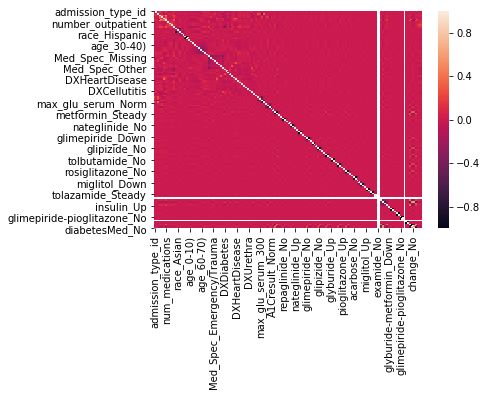

In [673]:
sb.heatmap(data_new.corr())

In [674]:
data_new.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_0-10),age_10-20),age_20-30),age_30-40),age_40-50),age_50-60),age_60-70),...,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted30,readmittedYN
count,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,...,99492.000000,99492.00000,99492.0,99492.0,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.00000,99492.00000,99492.0,99492.00000,99492.00000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000,99492.000000
mean,2.027238,3.740884,5.770997,4.398454,43.072971,1.340540,16.026545,0.373357,0.201343,0.643107,7.439251,0.193081,0.006443,0.764876,0.020474,0.015127,0.538486,0.461514,0.001608,0.006855,0.016192,0.037179,0.095133,0.169813,0.221003,...,0.000382,0.00001,1.0,1.0,0.121005,0.467324,0.300547,0.111125,0.000030,0.993165,0.006744,0.000060,0.999869,0.000131,0.99999,0.00001,1.0,0.99999,0.00001,0.461444,0.538556,0.231184,0.768816,0.112260,0.464118
std,1.450861,5.309413,4.072906,2.986972,19.695587,1.703686,8.119809,1.276805,0.939981,1.271370,1.926043,0.394718,0.080008,0.424079,0.141616,0.122058,0.498519,0.498519,0.040070,0.082510,0.126215,0.189201,0.293400,0.375470,0.414924,...,0.019540,0.00317,0.0,0.0,0.326134,0.498934,0.458498,0.314288,0.005491,0.082390,0.081846,0.007766,0.011430,0.011430,0.00317,0.00317,0.0,0.00317,0.00317,0.498514,0.498514,0.421592,0.421592,0.315688,0.498713
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.0,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.00000,1.0,1.00000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.00000,1.0,1.00000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,1.0,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,1.0

In [675]:
data_new.dtypes[data_new.dtypes == 'object']

readmitted         object
FreeText_diag_1    object
FreeText_diag_2    object
FreeText_diag_3    object
dtype: object

In [676]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99492 entries, 0 to 101765
Columns: 141 entries, admission_type_id to readmittedYN
dtypes: int32(16), int64(22), object(4), uint8(99)
memory usage: 36.0+ MB


In [677]:
data_new.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient',
       ...
       'glimepiride-pioglitazone_Steady', 'metformin-rosiglitazone_No',
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes',
       'readmitted30', 'readmittedYN'],
      dtype='object', length=141)

In [678]:
#data_new = data_new.select_dtypes(include=['int32', 'int64'])

# create X dataframe without readmitted output column
X = data_new.drop(['readmitted30', 'readmittedYN', 'readmitted', 'FreeText_diag_1', 'FreeText_diag_2', 'FreeText_diag_3'], axis=1)
#X = data_new.drop(['readmitted30', 'readmittedYN'], axis=1)

# create y dataframe with readmitted output column
y = data_new['readmitted30']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [679]:
cols = X.columns
cols

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient',
       ...
       'glipizide-metformin_Steady', 'glimepiride-pioglitazone_No',
       'glimepiride-pioglitazone_Steady', 'metformin-rosiglitazone_No',
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes'],
      dtype='object', length=135)

In [680]:
pca = PCA(n_components=0.9)
m = pca.fit_transform(X_scaled)

In [681]:
df = pd.DataFrame(m)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
0,-3.977396,2.445607,-0.837380,-1.579464,0.452278,0.398907,0.805814,-0.113410,-0.328299,-0.127622,1.024284,0.747174,0.136132,-0.019359,-0.094847,0.275395,0.011578,-0.393403,-0.079794,0.120494,-0.012514,0.617995,-1.027971,-3.010344,-3.269586,...,-3.103939,-4.855751,-2.144537,1.480918,1.106770,-1.068857,-1.196268,2.727905,1.759081,0.977528,-2.950421,-4.820311,-2.887115,-2.056174,1.004104,-0.217149,1.796892,-3.492451,2.952306,0.933779,-2.344585,-4.056034,6.356901,-1.514244,-2.883435
1,1.209734,-1.877701,-0.235906,-1.961752,-0.741736,0.454223,-0.167130,0.290171,-0.585947,0.287744,-0.458755,0.714102,-0.006337,0.014602,-0.074322,0.083818,-0.125058,0.173459,-0.310187,0.165958,-0.102099,-0.685951,0.097356,-1.049718,-2.861419,...,1.046277,3.353644,-0.223781,-2.127984,0.118854,0.343005,0.007449,-1.395939,1.021119,-0.425589,0.829371,-0.773864,-1.790744,-0.279161,1.486511,-0.467259,0.700820,-1.305006,0.169805,0.522443,-0.470930,-2.325864,1.657048,-2.891052,-0.760709
2,-1.045707,1.065427,-1.239926,-2.196401,1.485877,-0.510157,-2.847217,-0.306976,1.245061,0.376807,0.460868,-0.232192,-0.085751,0.147267,-0.051437,0.057864,0.122250,-0.147421,0.430648,-0.712902,-0.876554,0.166876,0.472362,0.054272,0.324117,...,-0.228628,-0.531331,0.522428,1.721244,-1.711919,-0.468535,-0.169935,0.466929,-1.473808,0.796770,1.561798,0.457745,0.344747,-0.257610,-0.529169,0.614360,-1.125327,0.627867,-0.908408,0.055128,1.331739,-0.196931,-0.690939,0.413241,0.071050
3,1.055857,-1.209226,-0.204400,-0.592753,0.634129,-0.719378,0.657773,0.949166,-0.406860,0.074096,-0.516434,-0.318688,-0.087757,0.102380,0.131843,-0.138285,0.167182,0.238988,0.095445,-0.013112,-0.055855,-1.097150,1.420154,1.428991,-1.833188,...,-0.037051,-0.078444,-0.070209,-0.158797,0.278552,-0.291287,-0.008399,0.039302,-0.373875,-0.318214,0.308263,-0.115731,0.318515,-0.517199,-0.341862,0.430861,-0.077785,0.399838,-0.558347,0.226690,-0.295978,0.429982,-0.987976,-0.657984,-0.183727
4,1.339391,1.419524,-0.392739,-0.934718,2.080885,-1.295639,-2.588615,-0.052564,-0.882817,0.622509,-1.334849,0.403152,-0.284249,0.195330,-0.078172,0.056898,0.081875,0.664119,0.146761,0.682946,-0.479463,-1.617677,1.204471,-0.535871,-0.268157,...,-0.059775,0.008189,0.063754,0.154120,-0.051988,-0.113868,0.063860,0.315307,-0.180862,0.113589,-0.092019,-0.124087,-0.148904,-0.405345,0.130622,0.017574,0.186772,0.008522,-0.061255,-0.240973,0.004907,0.483279,-0.348196,-0.546872,0.150765


In [682]:
pca.explained_variance_ratio_

array([0.0358573 , 0.02216482, 0.02070993, 0.01932965, 0.0170289 ,
       0.01666133, 0.0163829 , 0.01628543, 0.01578266, 0.01561051,
       0.01533609, 0.01522713, 0.0151934 , 0.01516734, 0.01515856,
       0.01515277, 0.01514561, 0.01510499, 0.01508568, 0.01500224,
       0.01490762, 0.0147404 , 0.01456005, 0.01358628, 0.01323708,
       0.01248819, 0.01192152, 0.01171649, 0.01051411, 0.01032355,
       0.00989484, 0.00954072, 0.00929772, 0.00911341, 0.00903164,
       0.00891241, 0.00863243, 0.00860019, 0.00852571, 0.00828591,
       0.0082527 , 0.00816135, 0.00814295, 0.00804078, 0.00799051,
       0.00797827, 0.00788342, 0.00781911, 0.00781709, 0.00779015,
       0.00774953, 0.00772359, 0.00769681, 0.00768255, 0.00766625,
       0.00763973, 0.00761999, 0.00760872, 0.00759458, 0.00758701,
       0.00758316, 0.00758177, 0.00757479, 0.00756734, 0.00756055,
       0.00755187, 0.00752677, 0.0075131 , 0.00750017, 0.00749375,
       0.00747957, 0.00745049, 0.00742495, 0.00739469, 0.00734

In [683]:
print(pca.components_)

[[-0.00577534 -0.00766401 -0.01274112 ... -0.39357291 -0.37410147
   0.37410147]
 [ 0.16831635 -0.03727708 -0.02159188 ... -0.00363902 -0.02526994
   0.02526994]
 [ 0.26663483  0.08452821  0.3405301  ... -0.03952912 -0.01744071
   0.01744071]
 ...
 [-0.08588403  0.03051026  0.04792167 ... -0.00647467  0.00864205
  -0.00864205]
 [ 0.01479881 -0.1088697  -0.0156584  ...  0.02620036  0.00507371
  -0.00507371]
 [-0.11844401 -0.33782145  0.05774139 ... -0.01756732  0.03778646
  -0.03778646]]


In [684]:
print(m[0:5,:])

[[-3.97739603e+00  2.44560679e+00 -8.37379647e-01 -1.57946410e+00
   4.52278447e-01  3.98907260e-01  8.05813694e-01 -1.13410406e-01
  -3.28299007e-01 -1.27621815e-01  1.02428365e+00  7.47174005e-01
   1.36131957e-01 -1.93594712e-02 -9.48467399e-02  2.75395214e-01
   1.15783432e-02 -3.93403167e-01 -7.97944198e-02  1.20494226e-01
  -1.25144748e-02  6.17995158e-01 -1.02797082e+00 -3.01034396e+00
  -3.26958551e+00 -1.75162658e+00 -4.36315079e+00 -1.81449209e+00
  -2.32158216e+00  1.04819359e+00 -4.42307724e-01 -1.18702275e+00
  -5.49313579e-01  4.16859663e+00  2.28740648e+00 -4.69530281e+00
  -6.45948919e-01 -1.00177659e+00  7.99228717e-01 -1.52305251e+00
   1.23071332e+00 -6.22894520e-03  3.37393657e-01 -2.37908755e+00
  -1.65285832e+00 -1.10376524e+00 -1.14609597e+00 -3.31083851e+00
   1.95653590e+00  3.92080391e+00 -1.15834610e+00 -8.97386546e-01
  -3.38260982e+00  8.22888076e-01  1.97859875e+00 -9.80169372e+00
   1.02279340e+01  4.38647307e+00  5.41967349e+00  3.10563501e+00
  -3.10393

In [685]:
pdf = pd.concat([df[[0,1]], data_prep[['readmitted30']]], axis = 1)

In [686]:
print(pdf.head())
pdf.readmitted30.value_counts()

          0         1  readmitted30
0 -3.977396  2.445607           0.0
1  1.209734 -1.877701           0.0
2 -1.045707  1.065427           0.0
3  1.055857 -1.209226           0.0
4  1.339391  1.419524           0.0


0.0    88323
1.0    11169
Name: readmitted30, dtype: int64

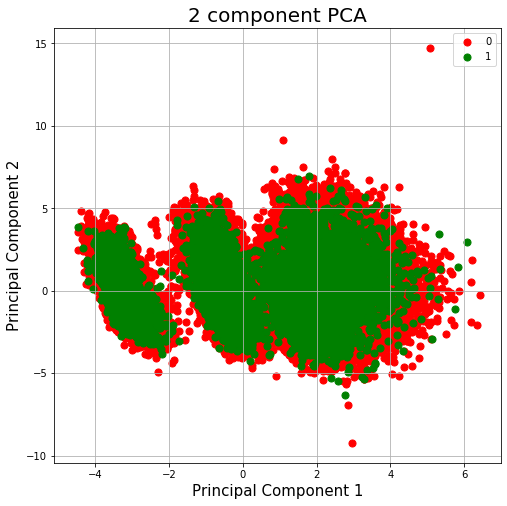

In [687]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pdf['readmitted30'] == target
    ax.scatter(pdf.loc[indicesToKeep, 0], pdf.loc[indicesToKeep, 1], c = color, s = 50)
ax.legend(targets)
ax.grid()

In [688]:
from collections import Counter
print("readmitted30")
print(Counter(data_new['readmitted30']))
print(" ")
print("readmittedYN")
print(Counter(data_new['readmittedYN']))

readmitted30
Counter({0: 88323, 1: 11169})
 
readmittedYN
Counter({0: 53316, 1: 46176})


In [689]:
most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]

In [690]:
np.abs(pca.components_[25]).argmax()

98

In [691]:
pca.components_[25]

array([ 8.97956628e-03,  7.65365410e-02,  2.05286905e-02,  1.34908099e-01,
        3.55159700e-02, -1.01128865e-02,  6.50298610e-02, -4.57212929e-02,
       -9.35855776e-03,  5.79719629e-03,  5.49435987e-02,  1.45291369e-01,
        3.50923472e-02, -1.66044586e-01,  2.72763842e-02,  5.24048553e-02,
       -1.11883065e-01,  1.11883065e-01, -5.18981014e-02, -7.07159918e-02,
       -6.69083646e-02, -2.03492493e-02, -1.16442731e-02, -3.03837545e-02,
       -3.33856801e-03,  7.39724375e-02,  4.85827435e-03,  1.41958044e-02,
       -8.89561319e-02,  7.35681169e-02,  2.96801355e-02,  5.23946222e-02,
       -3.40982738e-02,  1.49055365e-02,  7.31592036e-03,  4.26928012e-03,
       -2.61871417e-02, -5.68357189e-02, -3.93133031e-02, -1.84751595e-02,
       -1.34882868e-02, -7.60123482e-05, -5.95274869e-02,  6.69690163e-02,
        7.58977878e-02,  3.52224830e-02,  5.64106625e-02,  3.46181717e-02,
        3.60281244e-03, -1.61674230e-03,  1.23628651e-02, -4.45708195e-02,
        9.42120795e-03,  

# Need to reselect feature_names

In [692]:
feature_names = cols

In [693]:
most_important_names = [feature_names[most_important[i]] for i in range(pca.components_.shape[0])]

In [694]:
most_important_names

['change_No',
 'number_diagnoses',
 'max_glu_serum_None',
 'race_Caucasian',
 'glyburide_No',
 'glimepiride_No',
 'glipizide_No',
 'rosiglitazone_No',
 'A1Cresult_None',
 'glipizide-metformin_No',
 'repaglinide_No',
 'chlorpropamide_No',
 'metformin-pioglitazone_No',
 'tolazamide_No',
 'glimepiride-pioglitazone_No',
 'acetohexamide_No',
 'tolbutamide_No',
 'metformin-pioglitazone_No',
 'troglitazone_Steady',
 'acarbose_No',
 'nateglinide_No',
 'glipizide-metformin_Steady',
 'A1Cresult_None',
 'insulin_Steady',
 'race_Caucasian',
 'rosiglitazone_No',
 'Med_Spec_Other',
 'Med_Spec_Missing',
 'Med_Spec_Missing',
 'DXHTN_Kidney',
 'age_70-80)',
 'age_60-70)',
 'number_emergency',
 'DXFluid',
 'Med_Spec_InternalMedicine',
 'Med_Spec_Emergency/Trauma',
 'age_50-60)',
 'insulin_Up',
 'Med_Spec_Family/GeneralPractice',
 'glyburide_Up',
 'DXCellutitis',
 'metformin_Down',
 'age_30-40)',
 'age_90-100)',
 'A1Cresult_Norm',
 'A1Cresult_7',
 'glipizide_Up',
 'age_30-40)',
 'age_20-30)',
 'race_Hisp

# Feature selection

['number_diagnoses',
 'num_procedures',
 'Med_Spec_Other',
 'time_in_hospital',
 'Med_Spec_Nephrology',
 'Med_Spec_InternalMedicine',
 'Med_Spec_Family/GeneralPractice',
 'Med_Spec_Family/GeneralPractice',
 'Med_Spec_Surgery-General',
 'DXPneumonia',
 'DXCellutitis',
 'DXCellutitis',
 'DXCVD',
 'DXCVD',
 'DXResp',
 'DXLipid',
 'DXDevice',
 'DXUrethra',
 'number_outpatient',
 'DXHeartAttack',
 'DXHeartFailure',
 'DXHypertension',
 'DXHeartAttack',
 'DXDiabetes',
 'Med_Spec_Cardiology',
 'number_inpatient',
 'num_lab_procedures']

In [695]:
xvector = pca.components_[0]
yvector = pca.components_[1]

In [696]:
xs = m[:,0]
ys = m[:,1]

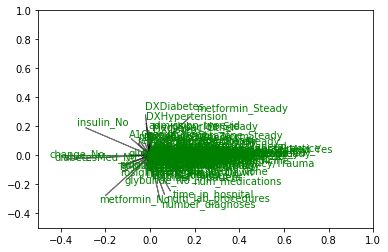

In [697]:
# scalex = 1.0/(xs.max() - xs.min())
# scaley = 1.0/(ys.max() - ys.min())
# classes = np.unique(pdf['readmitted'])
# colors = ['g','r','w']
# for s, l in enumerate(classes):
#    plt.scatter(xs, ys, c = colors[s])

for i in range(len(xvector)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, xvector[i], yvector[i], color='k', alpha=0.5)
    plt.text(xvector[i]*1.15, yvector[i]*1.15, feature_names[i], color='g')

plt.xlim(-.5,1)
plt.ylim(-.5,1)

plt.show()

In [698]:
#data_new = data_new.drop(['readmitted','encounter_id','patient_nbr','weight','payer_code','medical_specialty',
#                          'diag_1','diag_2','diag_3'], axis=1)

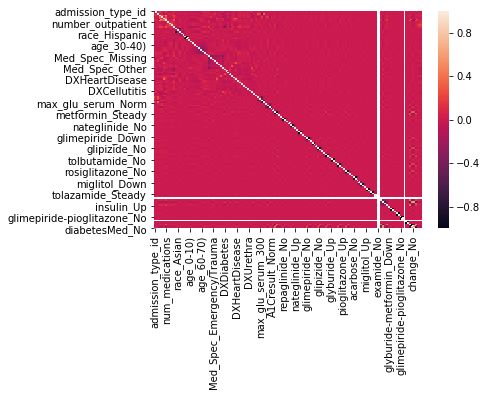

In [699]:
import seaborn as sb
sb.heatmap(data_new.corr())

In [700]:
data_new.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,FreeText_diag_1,FreeText_diag_2,FreeText_diag_3,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_0-10),age_10-20),age_20-30),...,tolazamide_Steady,tolazamide_Up,examide_No,citoglipton_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_No,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,readmitted30,readmittedYN
0,6,25,1,1,41,0,1,0,0,0,1,NO,NaN,?,?,0,0,1,0,0,1,0,1,0,0,...,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0
1,1,1,7,3,59,0,18,0,0,0,9,>30,NaN,NaN,NaN,0,0,1,0,0,1,0,0,1,0,...,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1
2,1,1,7,2,11,5,13,2,0,1,6,NO,NaN,NaN,V27,1,0,0,0,0,1,0,0,0,1,...,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0
3,1,1,7,2,44,1,16,0,0,0,7,NO,NaN,NaN,NaN,0,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0
4,1,1,7,1,51,0,8,0,0,0,5,NO,NaN,NaN,NaN,0,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0


In [701]:
X = data_new.drop(['readmitted30', 'readmittedYN', 'readmitted', 'FreeText_diag_1', 'FreeText_diag_2', 'FreeText_diag_3'],axis=1)
#X = data_new.drop(['readmitted30', 'readmittedYN'],axis=1)
X = X.values

In [702]:
y = data_new['readmitted30'].values

In [703]:
def select_features(x,y):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(x,y)
    x_fs = fs.transform(x)
    return x_fs, fs

In [704]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [705]:
oe = OrdinalEncoder()
oe.fit(X)
X_enc = oe.transform(X)

In [706]:
le = LabelEncoder()
le.fit(y)
y_enc = le.transform(y)

In [707]:
X_fs, fs = select_features(X_enc,y_enc)

Feature admission_type_id: 27.915822
Feature discharge_disposition_id: 2433.363667
Feature admission_source_id: 14.102625
Feature time_in_hospital: 513.741057
Feature num_lab_procedures: 384.418559
Feature num_procedures: 29.340813
Feature num_medications: 679.373832
Feature number_outpatient: 155.007793
Feature number_emergency: 1595.642376
Feature number_inpatient: 6850.590804
Feature number_diagnoses: 141.151788
Feature readmitted: 0.001207
Feature FreeText_diag_1: 0.758061
Feature FreeText_diag_2: 0.317949
Feature FreeText_diag_3: 1.369579
Feature race_AfricanAmerican: 3.824946
Feature race_Asian: 0.407689
Feature race_Caucasian: 0.475684
Feature race_Hispanic: 14.038701
Feature race_Other: 19.667636
Feature gender_Female: 16.295273
Feature gender_Male: 0.123569
Feature age_0-10): 3.039361
Feature age_10-20): 37.309722
Feature age_20-30): 0.000176
Feature age_30-40): 9.955028
Feature age_40-50): 12.048205
Feature age_50-60): 0.053109
Feature age_60-70): 9.735311
Feature age_70-80):

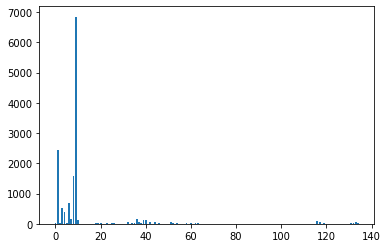

In [708]:
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (data_new.columns[i], fs.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# Feature selection


Feature time_in_hospital: 339.439159

Feature num_lab_procedures: 51.078492

Feature num_procedures: 11.313117

Feature num_medications: 301.140740

Feature number_outpatient: 58.863298

Feature number_emergency: 1209.088188

Feature number_inpatient: 4011.345217

Feature number_diagnoses: 119.563403

Feature Med_Spec_Missing: nan

Feature Med_Spec_InternalMedicine: 3.595612

Feature Med_Spec_Emergency/Trauma: 1.149243

Feature Med_Spec_Family/GeneralPractice: 8.896960

Feature Med_Spec_Cardiology: 41.854654

Feature Med_Spec_Surgery-General: 0.100990

Feature Med_Spec_Nephrology: 37.646395

Feature Med_Spec_Other: 11.392142

Feature DXDiabetes: 95.137843

Feature DXLipid: 24.359704

Feature DXFluid: 7.187711

Feature DXHypertension: 68.440958

Feature DXHTN_Kidney: 110.479924

Feature DXHeartAttack: 1.901142

Feature DXHeartDisease: 35.795214

Feature DXDysrhythm: 0.744094

Feature DXHeartFailure: 40.409050

Feature DXCVD: 0.088283

Feature DXPneumonia: 9.813223

Feature DXAirway: 6.669752

Feature DXUrethra: 2.299106

Feature DXCellutitis: 0.210196

Feature DXOsteo: 0.193165

Feature DXResp: 33.635795

Feature DXDevice: 22.939349

# Oversampling train

In [709]:
# import needed libraries
from sklearn.model_selection import train_test_split

# split data into train and test

# create X dataframe without readmitted output column
X = data_new.drop(['readmitted30', 'readmittedYN', 'readmitted', 'FreeText_diag_1', 'FreeText_diag_2', 'FreeText_diag_3'],axis=1)
#X = data_new.drop(['readmitted30', 'readmittedYN'],axis=1)
#X = X.values

# create y dataframe with readmitted output column
y = data_prep['readmitted30']

In [881]:
# import needed libraries
from sklearn.model_selection import train_test_split

# perform train and test split while setting a random state seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Print shape of both train and split 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(69644, 135)
(69644,)
(29848, 135)
(29848,)


In [ ]:
import pickle
X_train_smote = pickle.load(open("X_train_smote.p", "rb"))
X_test = pickle.load(open("X_test.p", "rb"))
y_train_smote = pickle.load(open("y_train_smote.p", "rb"))
y_test = pickle.load(open("y_test.p", "rb" ))

# Print shape of both train and split 
print(X_train_smote.shape)
print(y_train_smote.shape)
print(X_test.shape)
print(y_test.shape)

In [787]:
# import SMOTE.
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [1010]:
# transform the dataset due to the imbalance issue using SMOTE

# sampling strategy allows us to pick ratio of minority oversampling over majority. 1.0 = 50/50
#oversample = SMOTE(sampling_strategy=0.2)
undersample = RandomUnderSampler(sampling_strategy=1.0)

# fit x_train and y_train to oversampling object
#X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
#X_train_smote, y_train_smote = undersample.fit_resample(X_train_smote, y_train_smote)

X_train_smote, y_train_smote = undersample.fit_resample(X_train, y_train)

In [1011]:
y_train.value_counts()

0    61768
1     7876
Name: readmitted30, dtype: int64

In [1012]:
y_train_smote.value_counts()

1    7876
0    7876
Name: readmitted30, dtype: int64

# Random Forest - Base Model

In [1013]:
# import needed libraries
from sklearn.ensemble import RandomForestClassifier

# create randomforestclassifier model and fit it on train data
rnd_clf = RandomForestClassifier(random_state=0)

#rnd_clf.fit(X_train, y_train)
rnd_clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=0)

In [1014]:
# predict on test data using model
y_pred_rf = []
y_pred_rf_prob = []

y_pred_rf = rnd_clf.predict(X_test)
y_pred_rf_prob = rnd_clf.predict_proba(X_test)

In [1015]:
# import needed libraries
from sklearn.metrics import confusion_matrix

# create confusion matrix with y test against y predictions from model
confusion_matrix(y_test, y_pred_rf)

array([[16631,  9924],
       [ 1430,  1863]], dtype=int64)

In [1016]:
# import needed libraries
from sklearn.metrics import classification_report

# create classification report with y test against y predictions from model
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.63      0.75     26555
           1       0.16      0.57      0.25      3293

    accuracy                           0.62     29848
   macro avg       0.54      0.60      0.50     29848
weighted avg       0.84      0.62      0.69     29848



In [1017]:
# import needed libraries
from sklearn.metrics import roc_auc_score

base_probs = []

# limit to probability for class = 1 
base_probs = y_pred_rf_prob[:,1]

# calculate roc_auc_score
print(roc_auc_score(y_test, base_probs))

0.6345683714386364


In [1018]:
feature_importances = pd.DataFrame(rnd_clf.feature_importances_, index = X_train_smote.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                                 importance
num_lab_procedures                 0.084331
num_medications                    0.075616
time_in_hospital                   0.056458
number_inpatient                   0.051722
discharge_disposition_id           0.043906
num_procedures                     0.039602
number_diagnoses                   0.038949
admission_type_id                  0.028159
admission_source_id                0.024982
number_outpatient                  0.020272
number_emergency                   0.016509
Med_Spec_Missing                   0.015703
gender_Female                      0.014740
age_70-80)                         0.014704
gender_Male                        0.014698
age_60-70)                         0.013748
DXHeartFailure                     0.013190
DXFluid                            0.012591
race_Caucasian                     0.012274
age_80-90)                         0.012062
age_50-60)                         0.011578
race_AfricanAmerican            

# Random Forest - Randomized Search

In [136]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [137]:
# Use the random grid to search for best hyperparameters

# create randomforestclassifier model and fit it on train data
rf = RandomForestClassifier(random_state=0)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model
#rf_random.fit(X_train, y_train)
rf_random.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 132.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 197.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [139]:
# Assign best parameters to variable using .best_params_
rf_random_optimized_parms = rf_random.best_params_

# Create best model using .best_estimator_
rf_random_optimized = rf_random.best_estimator_

In [140]:
#look at best parameters
rf_random_optimized_parms

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [542]:
# predict on test data using model
y_pred_rf2 = rf_random_optimized.predict(X_test)
y_pred_rf_prob2 = rf_random_optimized.predict_proba(X_test)

In [543]:
# create confusion matrix with y test against y predictions from model
confusion_matrix(y_test, y_pred_rf2)

array([[13582,    22],
       [ 1591,    23]], dtype=int64)

In [544]:
# create classification report with y test against y predictions from model
print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94     13604
           1       0.51      0.01      0.03      1614

    accuracy                           0.89     15218
   macro avg       0.70      0.51      0.49     15218
weighted avg       0.85      0.89      0.85     15218



In [545]:
# limit to probability for class = 1 
base_probs2 = y_pred_rf_prob2[:,1]

# calculate roc_auc_score
print(roc_auc_score(y_test, base_probs2))

0.6592299234462348


In [546]:
feature_importances2 = pd.DataFrame(rf_random_optimized.feature_importances_, index = X_train_smote.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances2)

                                 importance
num_lab_procedures                 0.158630
num_medications                    0.135350
time_in_hospital                   0.091809
num_procedures                     0.065852
number_inpatient                   0.063041
number_diagnoses                   0.060272
discharge_disposition_id           0.049987
admission_type_id                  0.044542
admission_source_id                0.033967
number_emergency                   0.027706
number_outpatient                  0.025362
DXFluid                            0.017325
DXHeartFailure                     0.017312
Med_Spec_InternalMedicine          0.016332
DXDysrhythm                        0.015557
Med_Spec_Other                     0.013474
Med_Spec_Family/GeneralPractice    0.013183
DXDiabetes                         0.013009
DXHeartDisease                     0.012894
Med_Spec_Emergency/Trauma          0.011934
DXAirway                           0.011428
DXUrethra                       

# Random Forest - Grid Search

In [727]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 60],
    'max_features': ['auto'],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [1400, 1500]
}
# Create a based model
rf = RandomForestClassifier(random_state=0)

# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 2)

# Fit the random search model
rf_grid.fit(X_train, y_train)
#rf_grid.fit(X_train_smote, y_train_smote)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 61.9min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 70.2min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [50, 60],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [2],
                         'n_estimators': [1400, 1500]},
             verbose=2)

In [728]:
# Assign best parameters to variable using .best_params_
rf_grid_optimized_parms = rf_grid.best_params_

# Create best model using .best_estimator_
rf_grid_optimized = rf_grid.best_estimator_

In [729]:
#look at best parameters
rf_grid_optimized_parms

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1500}

In [730]:
# predict on test data using model
y_pred_rf3 = rf_grid_optimized.predict(X_test)
y_pred_rf_prob3 = rf_grid_optimized.predict_proba(X_test)

In [731]:
# create confusion matrix with y test against y predictions from model
confusion_matrix(y_test, y_pred_rf3)

array([[26539,    16],
       [ 3269,    24]], dtype=int64)

In [732]:
# create classification report with y test against y predictions from model
print(classification_report(y_test, y_pred_rf3))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     26555
           1       0.60      0.01      0.01      3293

    accuracy                           0.89     29848
   macro avg       0.75      0.50      0.48     29848
weighted avg       0.86      0.89      0.84     29848



In [733]:
# limit to probability for class = 1 
base_probs3 = y_pred_rf_prob3[:,1]

# calculate roc_auc_score
print(roc_auc_score(y_test, base_probs3))

0.6388218951859392


In [734]:
feature_importances3 = pd.DataFrame(rf_grid_optimized.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances3)

                                   importance
num_lab_procedures               9.192543e-02
num_medications                  8.206144e-02
time_in_hospital                 5.987548e-02
number_inpatient                 5.066646e-02
discharge_disposition_id         4.255816e-02
num_procedures                   4.159662e-02
number_diagnoses                 3.807774e-02
admission_type_id                2.852963e-02
admission_source_id              2.511265e-02
number_outpatient                2.119374e-02
number_emergency                 1.798777e-02
Med_Spec_Missing                 1.552818e-02
gender_Female                    1.539405e-02
gender_Male                      1.537603e-02
age_70-80)                       1.476708e-02
age_60-70)                       1.420821e-02
DXHeartFailure                   1.305445e-02
DXFluid                          1.298395e-02
race_Caucasian                   1.236579e-02
age_80-90)                       1.198036e-02
race_AfricanAmerican             1

# Random Forest - Top Features

In [818]:
feature_importances2.reset_index(inplace=True)

In [736]:
top10featdf = feature_importances2.nlargest(50,'importance')

In [737]:
top10featdf['index']

0                  num_lab_procedures
1                     num_medications
2                    time_in_hospital
3                      num_procedures
4                    number_inpatient
5                    number_diagnoses
6            discharge_disposition_id
7                   admission_type_id
8                 admission_source_id
9                    number_emergency
10                  number_outpatient
11                            DXFluid
12                     DXHeartFailure
13          Med_Spec_InternalMedicine
14                        DXDysrhythm
15                     Med_Spec_Other
16    Med_Spec_Family/GeneralPractice
17                         DXDiabetes
18                     DXHeartDisease
19          Med_Spec_Emergency/Trauma
20                           DXAirway
21                          DXUrethra
22                     DXHypertension
23                       DXCellutitis
24                       DXHTN_Kidney
25           Med_Spec_Surgery-General
26          

In [738]:
X_TOP = X[top10featdf['index']]

In [739]:
X_TOP.shape

(99492, 35)

In [740]:
# perform train and test split while setting a random state seed
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_TOP, y, test_size=0.3, random_state=42)

# Print shape of both train and split 
print(X_train_top.shape)
print(y_train_top.shape)
print(X_test_top.shape)
print(y_test_top.shape)

(69644, 35)
(69644,)
(29848, 35)
(29848,)


In [741]:
# transform the dataset due to the imbalance issue using SMOTE

# sampling strategy allows us to pick ratio of minority oversampling over majority. 1.0 = 50/50
oversample = SMOTE(sampling_strategy='auto')

# fit x_train and y_train to oversampling object
X_train_top_smote, y_train_top_smote = oversample.fit_resample(X_train_top, y_train_top)

In [742]:
# create randomforestclassifier model and fit it on top 10 features train data
rnd_clf_top = RandomForestClassifier()

rnd_clf_top = RandomForestClassifier(random_state=0, bootstrap=True, n_estimators=1500, min_samples_split=2, min_samples_leaf=1, max_depth=60)

rnd_clf_top.fit(X_train_top, y_train_top)
#rnd_clf_top.fit(X_train_top_smote, y_train_top_smote)

RandomForestClassifier(max_depth=60, n_estimators=1500, random_state=0)

In [743]:
# predict on test data using model
y_pred_rf_top = rnd_clf_top.predict(X_test_top)
y_pred_rf_prob_top = rnd_clf_top.predict_proba(X_test_top)

In [744]:
# create confusion matrix with y test against y predictions from model
confusion_matrix(y_test_top, y_pred_rf_top)

array([[26484,    51],
       [ 3282,    31]], dtype=int64)

In [745]:
# create classification report with y test against y predictions from model
print(classification_report(y_test_top, y_pred_rf_top))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     26535
           1       0.38      0.01      0.02      3313

    accuracy                           0.89     29848
   macro avg       0.63      0.50      0.48     29848
weighted avg       0.83      0.89      0.84     29848



In [746]:
# limit to probability for class = 1 
base_probs_top = y_pred_rf_prob_top[:,1]

# calculate roc_auc_score
print(roc_auc_score(y_test_top, base_probs_top))

0.6367180160766999


In [747]:
feature_importances4 = pd.DataFrame(rnd_clf_top.feature_importances_, index = X_TOP.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances4)

                                 importance
num_lab_procedures                 0.169175
num_medications                    0.140273
time_in_hospital                   0.092754
num_procedures                     0.062084
number_inpatient                   0.057584
number_diagnoses                   0.057096
discharge_disposition_id           0.055802
admission_type_id                  0.040796
admission_source_id                0.035012
number_outpatient                  0.030955
number_emergency                   0.023615
DXFluid                            0.017815
DXHeartFailure                     0.017515
Med_Spec_InternalMedicine          0.017294
DXDysrhythm                        0.015744
DXHeartDisease                     0.012650
Med_Spec_Other                     0.012286
Med_Spec_Family/GeneralPractice    0.011837
DXAirway                           0.011782
DXUrethra                          0.011649
DXHypertension                     0.010996
DXDiabetes                      

# Random Forest - Final

In [1088]:
# create randomforestclassifier model and fit it on train data
rf_final = RandomForestClassifier(random_state=0, bootstrap=True, n_estimators=1500, min_samples_split=2, min_samples_leaf=1, max_depth=60)

# Fit the model
#rf_final.fit(X_train, y_train)
rf_final.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=60, n_estimators=1500, random_state=0)

In [1089]:
# predict on test data using model
y_pred_rf_final = rf_final.predict(X_test)
y_pred_rf_prob_final = rf_final.predict_proba(X_test)

In [1090]:
# create confusion matrix with y test against y predictions from model
confusion_matrix(y_test, y_pred_rf_final)

array([[16473, 10082],
       [ 1369,  1924]], dtype=int64)

In [1091]:
# create classification report with y test against y predictions from model
print(classification_report(y_test, y_pred_rf_final))

              precision    recall  f1-score   support

           0       0.92      0.62      0.74     26555
           1       0.16      0.58      0.25      3293

    accuracy                           0.62     29848
   macro avg       0.54      0.60      0.50     29848
weighted avg       0.84      0.62      0.69     29848



In [1092]:
# limit to probability for class = 1 
base_probs_final = y_pred_rf_prob_final[:,1]

# calculate roc_auc_score
print(roc_auc_score(y_test, base_probs_final))

0.6457062140851774


In [1093]:
feature_importances5 = pd.DataFrame(rf_final.feature_importances_, index = X_train_smote.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances5)

                                 importance
num_lab_procedures                 0.084937
num_medications                    0.075597
time_in_hospital                   0.057262
number_inpatient                   0.051514
discharge_disposition_id           0.043805
num_procedures                     0.040082
number_diagnoses                   0.038859
admission_type_id                  0.028142
admission_source_id                0.024612
number_outpatient                  0.020494
number_emergency                   0.016499
Med_Spec_Missing                   0.015836
age_70-80)                         0.014982
gender_Male                        0.014637
gender_Female                      0.014584
age_60-70)                         0.014033
DXHeartFailure                     0.012922
race_Caucasian                     0.012492
DXFluid                            0.012458
age_80-90)                         0.012101
age_50-60)                         0.011855
race_AfricanAmerican            

In [1094]:
# predict on train data using model
#y_pred_rf_final_train = rf_final.predict(X_train)
#y_pred_rf_prob_final_train = rf_final.predict_proba(X_train)
y_pred_rf_final_train = rf_final.predict(X_train_smote)
y_pred_rf_prob_final_train = rf_final.predict_proba(X_train_smote)

In [1095]:
# create confusion matrix with y test against y predictions from model
#confusion_matrix(y_train, y_pred_rf_final_train)
confusion_matrix(y_train_smote, y_pred_rf_final_train)

array([[7876,    0],
       [   0, 7876]], dtype=int64)

In [1096]:
# create classification report with y test against y predictions from model
#print(classification_report(y_train, y_pred_rf_final_train))
print(classification_report(y_train_smote, y_pred_rf_final_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7876
           1       1.00      1.00      1.00      7876

    accuracy                           1.00     15752
   macro avg       1.00      1.00      1.00     15752
weighted avg       1.00      1.00      1.00     15752



In [1097]:
# limit to probability for class = 1 
base_probs_final_train = y_pred_rf_prob_final_train[:,1]

# calculate roc_auc_score
#print(roc_auc_score(y_train, base_probs_final_train))
print(roc_auc_score(y_train_smote, base_probs_final_train))

1.0


# Deep Learning

In [761]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [1193]:
# create model
model = Sequential()
#model.add(Dense(len(X_train.columns), input_dim=len(X_train.columns), activation='relu'))
model.add(Dense(len(X_train_smote.columns), input_dim=len(X_train_smote.columns), activation='relu'))
model.add(Dropout(0.4))
#model.add(Dense(len(X_train.columns), input_dim=len(X_train.columns), activation='relu'))
model.add(Dense(len(X_train_smote.columns), input_dim=len(X_train_smote.columns), activation='relu'))
model.add(Dropout(0.4))
#model.add(Dense(len(X_train.columns), input_dim=len(X_train.columns), activation='relu'))
model.add(Dense(len(X_train_smote.columns), input_dim=len(X_train_smote.columns), activation='relu'))
model.add(Dropout(0.4))
#model.add(Dense(len(X_train.columns), input_dim=len(X_train.columns), activation='relu'))
model.add(Dense(len(X_train_smote.columns), input_dim=len(X_train_smote.columns), activation='relu'))
model.add(Dropout(0.4))
#model.add(Dense(len(X_train.columns), input_dim=len(X_train.columns), activation='relu'))
#model.add(Dense(len(X_train_smote.columns), input_dim=len(X_train_smote.columns), activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [1194]:
#model.fit(X_train, y_train, epochs=5, batch_size=10)
model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=10)

Epoch 1/20
1576/1576 [==============================] - 7s 4ms/step - loss: 0.7368 - accuracy: 0.5142
Epoch 2/20
1576/1576 [==============================] - 7s 4ms/step - loss: 0.6917 - accuracy: 0.5302
Epoch 3/20
1576/1576 [==============================] - 10s 7ms/step - loss: 0.6807 - accuracy: 0.5646
Epoch 4/20
1576/1576 [==============================] - 10s 6ms/step - loss: 0.6761 - accuracy: 0.5764
Epoch 5/20
1576/1576 [==============================] - 8s 5ms/step - loss: 0.6722 - accuracy: 0.5860
Epoch 6/20
1576/1576 [==============================] - 8s 5ms/step - loss: 0.6721 - accuracy: 0.5869
Epoch 7/20
1576/1576 [==============================] - 8s 5ms/step - loss: 0.6685 - accuracy: 0.5932
Epoch 8/20
1576/1576 [==============================] - 8s 5ms/step - loss: 0.6660 - accuracy: 0.5952
Epoch 9/20
1576/1576 [==============================] - 8s 5ms/step - loss: 0.6662 - accuracy: 0.5957
Epoch 10/20
1576/1576 [==============================] - 8s 5ms/step - loss: 0.6

In [1195]:
test_loss_dnn = 0.00
test_acc_dnn = 0.00

test_loss_dnn, test_acc_dnn = model.evaluate(X_test, y_test)

933/933 [==============================] - 2s 2ms/step - loss: 0.6718 - accuracy: 0.6336


In [1196]:
print('Test accuracy:', test_acc_dnn)

Test accuracy: 0.6335768103599548


In [1197]:
# predict on test data using model
y_pred_dnn_prob = []
y_pred_dnn = []

y_pred_dnn_prob = model.predict(X_test)
y_pred_dnn = (y_pred_dnn_prob > 0.5)

In [1198]:
# create confusion matrix with y test against y predictions from model
confusion_matrix(y_test, y_pred_dnn)

array([[17071,  9484],
       [ 1453,  1840]], dtype=int64)

In [1199]:
# create classification report with y test against y predictions from model
print(classification_report(y_test, y_pred_dnn))

              precision    recall  f1-score   support

           0       0.92      0.64      0.76     26555
           1       0.16      0.56      0.25      3293

    accuracy                           0.63     29848
   macro avg       0.54      0.60      0.50     29848
weighted avg       0.84      0.63      0.70     29848



In [1200]:
# limit to probability for class = 1
base_probs4 = []

base_probs4 = y_pred_dnn_prob[:,0]

# calculate roc_auc_score
print(roc_auc_score(y_test, base_probs4))

0.6438896335739648
